In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import warnings
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
os.getcwd()

'C:\\Users\\VINAY P'

In [4]:
os.chdir(r'C:\Users\VINAY P\Downloads')

In [5]:
df=pd.read_excel('Book1.xlsx')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3969 entries, 0 to 3968
Columns: 121 entries, MaxCallDate to target
dtypes: datetime64[ns](11), float64(72), int64(38)
memory usage: 3.7 MB


In [7]:
df.target.value_counts()

1    3393
0     576
Name: target, dtype: int64

In [8]:
df1=df.drop(['MaxCallDate', 'MinCallDate', 'MaxCallDate30Dlq', 'MinCallDate30Dlq','MaxCallDate60Dlq', 'MinCallDate60Dlq',
              'MaxCallDate90Dlq','MinCallDate90Dlq', 'RunDate', 'transaction_date', 'payment_date'], axis=1)

In [9]:
df1.head(2)

,MaxPaymentsDue,MaxPrincipalAmtDue,MaxCreditLimit,MaxLoanDlqDays,MaxFeesAmtDue,MaxCurrentBalance,MinPaymentsDue,MinPrincipalAmtDue,MinCreditLimit,MinLoanDlqDays,MinFeesAmtDue,MinCurrentBalance,Numofcalls,NumofSuccessfullCalls,15_PayGrossPayment,15_PayReversalPayment,15_PayActualPayment,15_PayCountPayment,15_PayCountReversal,15_PayAvgPaid,30_PayGrossPayment,30_PayReversalPayment,30_PayActualPayment,30_PayCountPayment,30_PayCountReversal,30_PayAvgPaid,60_PayGrossPayment,60_PayReversalPayment,60_PayActualPayment,60_PayCountPayment,60_PayCountReversal,60_PayAvgPaid,90_PayGrossPayment,90_PayReversalPayment,90_PayActualPayment,90_PayCountPayment,90_PayCountReversal,90_PayAvgPaid,MaxPaymentsDue30Dlq,MaxPrincipalAmtDue30Dlq,MaxCreditLimit30Dlq,MaxLoanDlqDays30Dlq,MaxFeesAmtDue30Dlq,MaxCurrentBalance30Dlq,MinPaymentsDue30Dlq,MinPrincipalAmtDue30Dlq,MinCreditLimit30Dlq,MinLoanDlqDays30Dlq,MinFeesAmtDue30Dlq,MinCurrentBalance30Dlq,Numofcalls30Dlq,NumofSuccessfullCalls30Dlq,AmtpaidAmtdue_15_30Dlq,AmtpaidAmtdue_30_30Dlq,AmtpaidAmtdue_60_30Dlq,AmtpaidAmtdue_90_30Dlq,AmtPaidCurrBal_15_30Dlq,AmtPaidCurrBal_30_30Dlq,AmtPaidCurrBal_60_30Dlq,AmtPaidCurrBal_90_30Dlq,AmtdueCurrBal_30Dlq,MaxPaymentsDue60Dlq,MaxPrincipalAmtDue60Dlq,MaxCreditLimit60Dlq,MaxLoanDlqDays60Dlq,MaxFeesAmtDue60Dlq,MaxCurrentBalance60Dlq,MinPaymentsDue60Dlq,MinPrincipalAmtDue60Dlq,MinCreditLimit60Dlq,MinLoanDlqDays60Dlq,MinFeesAmtDue60Dlq,MinCurrentBalance60Dlq,Numofcalls60Dlq,NumofSuccessfullCalls60Dlq,AmtpaidAmtdue_15_60Dlq,AmtpaidAmtdue_30_60Dlq,AmtpaidAmtdue_60_60Dlq,AmtpaidAmtdue_90_60Dlq,AmtPaidCurrBal_15_60Dlq,AmtPaidCurrBal_30_60Dlq,AmtPaidCurrBal_60_60Dlq,AmtPaidCurrBal_90_60Dlq,AmtdueCurrBal_60Dlq,MaxPaymentsDue90Dlq,MaxPrincipalAmtDue90Dlq,MaxCreditLimit90Dlq,MaxLoanDlqDays90Dlq,MaxFeesAmtDue90Dlq,MaxCurrentBalance90Dlq,MinPaymentsDue90Dlq,MinPrincipalAmtDue90Dlq,MinCreditLimit90Dlq,MinLoanDlqDays90Dlq,MinFeesAmtDue90Dlq,MinCurrentBalance90Dlq,Numofcalls90Dlq,NumofSuccessfullCalls90Dlq,AmtpaidAmtdue_15_90Dlq,AmtpaidAmtdue_30_90Dlq,AmtpaidAmtdue_60_90Dlq,AmtpaidAmtdue_90_90Dlq,AmtPaidCurrBal_15_90Dlq,AmtPaidCurrBal_30_90Dlq,AmtPaidCurrBal_60_90Dlq,AmtPaidCurrBal_90_90Dlq,AmtdueCurrBal_90Dlq,call_count,duration,target
0,421.60,416.41,0,1,561.17,0,421.60,416.41,0,1,561.17,0,0,0,450.0,0.0,450.0,1,0,450.0,450.00,0.0,450.00,1,0,450.00,871.60,0.0,871.60,2,0,435.80,1321.60,0.0,1321.60,3,0,440.53,421.60,416.41,0,1,561.17,0,421.60,407.65,0,1,574.57,0.0,7,0,1.07,1.07,2.07,3.13,0.0,0.0,0.0,0.0,0.0,421.60,416.41,0,1,561.17,0,421.60,409.63,0,2,559.57,9551.17,17,0,1.07,1.07,2.07,3.13,0.05,0.05,0.09,0.14,0.04,421.60,416.41,0,1,561.17,0,421.60,377.25,0,2,572.97,9551.17,27,0,1.07,1.07,2.07,3.13,0.05,0.05,0.09,0.14,0.04,NaN,NaN,1
1,313.86,289.70,0,1,0.00,0,313.86,289.70,0,1,0.00,0,0,0,0.0,0.0,0.0,0,0,0.0,312.72,0.0,312.72,1,0,312.72,672.72,0.0,672.72,2,0,336.36,672.72,0.0,672.72,2,0,336.36,313.86,289.70,0,1,0.00,0,312.72,286.43,0,1,0.00,0.0,9,0,0.00,1.00,2.15,2.15,0.0,0.0,0.0,0.0,0.0,313.86,289.70,0,1,0.00,0,627.72,549.26,0,32,45.00,2860.50,30,0,0.00,0.50,1.07,1.07,0.00,0.11,0.24,0.24,0.22,313.86,289.70,0,1,0.00,0,313.86,273.99,0,2,30.00,2860.50,68,0,0.00,1.00,2.14,2.14,0.00,0.11,0.24,0.24,0.11,3.0,87.0,0


In [10]:
df1.drop_duplicates(inplace=True)

In [11]:
df1.shape

(3348, 110)

In [12]:
df1.describe()

,MaxPaymentsDue,MaxPrincipalAmtDue,MaxCreditLimit,MaxLoanDlqDays,MaxFeesAmtDue,MaxCurrentBalance,MinPaymentsDue,MinPrincipalAmtDue,MinCreditLimit,MinLoanDlqDays,MinFeesAmtDue,MinCurrentBalance,Numofcalls,NumofSuccessfullCalls,15_PayGrossPayment,15_PayReversalPayment,15_PayActualPayment,15_PayCountPayment,15_PayCountReversal,15_PayAvgPaid,30_PayGrossPayment,30_PayReversalPayment,30_PayActualPayment,30_PayCountPayment,30_PayCountReversal,30_PayAvgPaid,60_PayGrossPayment,60_PayReversalPayment,60_PayActualPayment,60_PayCountPayment,60_PayCountReversal,60_PayAvgPaid,90_PayGrossPayment,90_PayReversalPayment,90_PayActualPayment,90_PayCountPayment,90_PayCountReversal,90_PayAvgPaid,MaxPaymentsDue30Dlq,MaxPrincipalAmtDue30Dlq,MaxCreditLimit30Dlq,MaxLoanDlqDays30Dlq,MaxFeesAmtDue30Dlq,MaxCurrentBalance30Dlq,MinPaymentsDue30Dlq,MinPrincipalAmtDue30Dlq,MinCreditLimit30Dlq,MinLoanDlqDays30Dlq,MinFeesAmtDue30Dlq,MinCurrentBalance30Dlq,Numofcalls30Dlq,NumofSuccessfullCalls30Dlq,AmtpaidAmtdue_15_30Dlq,AmtpaidAmtdue_30_30Dlq,AmtpaidAmtdue_60_30Dlq,AmtpaidAmtdue_90_30Dlq,AmtPaidCurrBal_15_30Dlq,AmtPaidCurrBal_30_30Dlq,AmtPaidCurrBal_60_30Dlq,AmtPaidCurrBal_90_30Dlq,AmtdueCurrBal_30Dlq,MaxPaymentsDue60Dlq,MaxPrincipalAmtDue60Dlq,MaxCreditLimit60Dlq,MaxLoanDlqDays60Dlq,MaxFeesAmtDue60Dlq,MaxCurrentBalance60Dlq,MinPaymentsDue60Dlq,MinPrincipalAmtDue60Dlq,MinCreditLimit60Dlq,MinLoanDlqDays60Dlq,MinFeesAmtDue60Dlq,MinCurrentBalance60Dlq,Numofcalls60Dlq,NumofSuccessfullCalls60Dlq,AmtpaidAmtdue_15_60Dlq,AmtpaidAmtdue_30_60Dlq,AmtpaidAmtdue_60_60Dlq,AmtpaidAmtdue_90_60Dlq,AmtPaidCurrBal_15_60Dlq,AmtPaidCurrBal_30_60Dlq,AmtPaidCurrBal_60_60Dlq,AmtPaidCurrBal_90_60Dlq,AmtdueCurrBal_60Dlq,MaxPaymentsDue90Dlq,MaxPrincipalAmtDue90Dlq,MaxCreditLimit90Dlq,MaxLoanDlqDays90Dlq,MaxFeesAmtDue90Dlq,MaxCurrentBalance90Dlq,MinPaymentsDue90Dlq,MinPrincipalAmtDue90Dlq,MinCreditLimit90Dlq,MinLoanDlqDays90Dlq,MinFeesAmtDue90Dlq,MinCurrentBalance90Dlq,Numofcalls90Dlq,NumofSuccessfullCalls90Dlq,AmtpaidAmtdue_15_90Dlq,AmtpaidAmtdue_30_90Dlq,AmtpaidAmtdue_60_90Dlq,AmtpaidAmtdue_90_90Dlq,AmtPaidCurrBal_15_90Dlq,AmtPaidCurrBal_30_90Dlq,AmtPaidCurrBal_60_90Dlq,AmtPaidCurrBal_90_90Dlq,AmtdueCurrBal_90Dlq,call_count,duration,target
count,3348.00000,3348.000000,3348.0,3348.0,3348.000000,3348.0,3348.00000,3348.000000,3348.0,3348.0,3348.000000,3348.0,3348.0,3348.0,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.00000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.00000,3348.000000,3348.0,3348.0,3348.000000,3348.0,3348.000000,3348.000000,3348.0,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.00000,3348.000000,3348.00000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.00000,3348.000000,3348.0,3348.0,3348.000000,3348.0,3348.000000,3348.000000,3348.0,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.00000,3348.000000,3348.0,3348.0,3348.000000,3348.0,3348.000000,3348.000000,3348.0,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,672.000000,672.000000,3348.000000
mean,416.67963,253.083041,0.0,1.0,12.489256,0.0,416.67963,253.083041,0.0,1.0,12.489256,0.0,0.0,0.0,89.740582,1.272016,88.468566,0.219235,0.002688,82.958354,355.921912,5.927664,349.994247,0.85454,0.011649,317.415257,705.526637,13.673345,691.853292,1.715352,0.025388,408.611317,1100.095747,21.606470,1078.489277,2.690860,0.042413,406.186658,416.67963,253.083041,0.0,1.0,12.489256,0.0,444.696977,256.120490,0.0,3.772103,15.019803,587.703551,5.966547,0.436380,0.197339,0.78963,1.656168,2.59155,0.001428,0.004137,0.005364,0.007829,0.004507,416.67963,253.083041,0.0,1.0,12

In [13]:
df1=df1.fillna(0)
df1.head(2)

,MaxPaymentsDue,MaxPrincipalAmtDue,MaxCreditLimit,MaxLoanDlqDays,MaxFeesAmtDue,MaxCurrentBalance,MinPaymentsDue,MinPrincipalAmtDue,MinCreditLimit,MinLoanDlqDays,MinFeesAmtDue,MinCurrentBalance,Numofcalls,NumofSuccessfullCalls,15_PayGrossPayment,15_PayReversalPayment,15_PayActualPayment,15_PayCountPayment,15_PayCountReversal,15_PayAvgPaid,30_PayGrossPayment,30_PayReversalPayment,30_PayActualPayment,30_PayCountPayment,30_PayCountReversal,30_PayAvgPaid,60_PayGrossPayment,60_PayReversalPayment,60_PayActualPayment,60_PayCountPayment,60_PayCountReversal,60_PayAvgPaid,90_PayGrossPayment,90_PayReversalPayment,90_PayActualPayment,90_PayCountPayment,90_PayCountReversal,90_PayAvgPaid,MaxPaymentsDue30Dlq,MaxPrincipalAmtDue30Dlq,MaxCreditLimit30Dlq,MaxLoanDlqDays30Dlq,MaxFeesAmtDue30Dlq,MaxCurrentBalance30Dlq,MinPaymentsDue30Dlq,MinPrincipalAmtDue30Dlq,MinCreditLimit30Dlq,MinLoanDlqDays30Dlq,MinFeesAmtDue30Dlq,MinCurrentBalance30Dlq,Numofcalls30Dlq,NumofSuccessfullCalls30Dlq,AmtpaidAmtdue_15_30Dlq,AmtpaidAmtdue_30_30Dlq,AmtpaidAmtdue_60_30Dlq,AmtpaidAmtdue_90_30Dlq,AmtPaidCurrBal_15_30Dlq,AmtPaidCurrBal_30_30Dlq,AmtPaidCurrBal_60_30Dlq,AmtPaidCurrBal_90_30Dlq,AmtdueCurrBal_30Dlq,MaxPaymentsDue60Dlq,MaxPrincipalAmtDue60Dlq,MaxCreditLimit60Dlq,MaxLoanDlqDays60Dlq,MaxFeesAmtDue60Dlq,MaxCurrentBalance60Dlq,MinPaymentsDue60Dlq,MinPrincipalAmtDue60Dlq,MinCreditLimit60Dlq,MinLoanDlqDays60Dlq,MinFeesAmtDue60Dlq,MinCurrentBalance60Dlq,Numofcalls60Dlq,NumofSuccessfullCalls60Dlq,AmtpaidAmtdue_15_60Dlq,AmtpaidAmtdue_30_60Dlq,AmtpaidAmtdue_60_60Dlq,AmtpaidAmtdue_90_60Dlq,AmtPaidCurrBal_15_60Dlq,AmtPaidCurrBal_30_60Dlq,AmtPaidCurrBal_60_60Dlq,AmtPaidCurrBal_90_60Dlq,AmtdueCurrBal_60Dlq,MaxPaymentsDue90Dlq,MaxPrincipalAmtDue90Dlq,MaxCreditLimit90Dlq,MaxLoanDlqDays90Dlq,MaxFeesAmtDue90Dlq,MaxCurrentBalance90Dlq,MinPaymentsDue90Dlq,MinPrincipalAmtDue90Dlq,MinCreditLimit90Dlq,MinLoanDlqDays90Dlq,MinFeesAmtDue90Dlq,MinCurrentBalance90Dlq,Numofcalls90Dlq,NumofSuccessfullCalls90Dlq,AmtpaidAmtdue_15_90Dlq,AmtpaidAmtdue_30_90Dlq,AmtpaidAmtdue_60_90Dlq,AmtpaidAmtdue_90_90Dlq,AmtPaidCurrBal_15_90Dlq,AmtPaidCurrBal_30_90Dlq,AmtPaidCurrBal_60_90Dlq,AmtPaidCurrBal_90_90Dlq,AmtdueCurrBal_90Dlq,call_count,duration,target
0,421.60,416.41,0,1,561.17,0,421.60,416.41,0,1,561.17,0,0,0,450.0,0.0,450.0,1,0,450.0,450.00,0.0,450.00,1,0,450.00,871.60,0.0,871.60,2,0,435.80,1321.60,0.0,1321.60,3,0,440.53,421.60,416.41,0,1,561.17,0,421.60,407.65,0,1,574.57,0.0,7,0,1.07,1.07,2.07,3.13,0.0,0.0,0.0,0.0,0.0,421.60,416.41,0,1,561.17,0,421.60,409.63,0,2,559.57,9551.17,17,0,1.07,1.07,2.07,3.13,0.05,0.05,0.09,0.14,0.04,421.60,416.41,0,1,561.17,0,421.60,377.25,0,2,572.97,9551.17,27,0,1.07,1.07,2.07,3.13,0.05,0.05,0.09,0.14,0.04,0.0,0.0,1
1,313.86,289.70,0,1,0.00,0,313.86,289.70,0,1,0.00,0,0,0,0.0,0.0,0.0,0,0,0.0,312.72,0.0,312.72,1,0,312.72,672.72,0.0,672.72,2,0,336.36,672.72,0.0,672.72,2,0,336.36,313.86,289.70,0,1,0.00,0,312.72,286.43,0,1,0.00,0.0,9,0,0.00,1.00,2.15,2.15,0.0,0.0,0.0,0.0,0.0,313.86,289.70,0,1,0.00,0,627.72,549.26,0,32,45.00,2860.50,30,0,0.00,0.50,1.07,1.07,0.00,0.11,0.24,0.24,0.22,313.86,289.70,0,1,0.00,0,313.86,273.99,0,2,30.00,2860.50,68,0,0.00,1.00,2.14,2.14,0.00,0.11,0.24,0.24,0.11,3.0,87.0,0


In [14]:
def IQR(variable):
    parm=variable
    Q95=parm.quantile(0.95)
    Q99=parm.quantile(0.99)
    parm=np.where(parm>Q99, Q99,parm)
    return parm

In [15]:
df1.target.value_counts()

1    2865
0     483
Name: target, dtype: int64

In [17]:
col=df1.columns
col=col.drop(['target'])

In [18]:
for i in col:
    df1[i]=IQR(df1[i])

In [19]:
df1.describe()

,MaxPaymentsDue,MaxPrincipalAmtDue,MaxCreditLimit,MaxLoanDlqDays,MaxFeesAmtDue,MaxCurrentBalance,MinPaymentsDue,MinPrincipalAmtDue,MinCreditLimit,MinLoanDlqDays,MinFeesAmtDue,MinCurrentBalance,Numofcalls,NumofSuccessfullCalls,15_PayGrossPayment,15_PayReversalPayment,15_PayActualPayment,15_PayCountPayment,15_PayCountReversal,15_PayAvgPaid,30_PayGrossPayment,30_PayReversalPayment,30_PayActualPayment,30_PayCountPayment,30_PayCountReversal,30_PayAvgPaid,60_PayGrossPayment,60_PayReversalPayment,60_PayActualPayment,60_PayCountPayment,60_PayCountReversal,60_PayAvgPaid,90_PayGrossPayment,90_PayReversalPayment,90_PayActualPayment,90_PayCountPayment,90_PayCountReversal,90_PayAvgPaid,MaxPaymentsDue30Dlq,MaxPrincipalAmtDue30Dlq,MaxCreditLimit30Dlq,MaxLoanDlqDays30Dlq,MaxFeesAmtDue30Dlq,MaxCurrentBalance30Dlq,MinPaymentsDue30Dlq,MinPrincipalAmtDue30Dlq,MinCreditLimit30Dlq,MinLoanDlqDays30Dlq,MinFeesAmtDue30Dlq,MinCurrentBalance30Dlq,Numofcalls30Dlq,NumofSuccessfullCalls30Dlq,AmtpaidAmtdue_15_30Dlq,AmtpaidAmtdue_30_30Dlq,AmtpaidAmtdue_60_30Dlq,AmtpaidAmtdue_90_30Dlq,AmtPaidCurrBal_15_30Dlq,AmtPaidCurrBal_30_30Dlq,AmtPaidCurrBal_60_30Dlq,AmtPaidCurrBal_90_30Dlq,AmtdueCurrBal_30Dlq,MaxPaymentsDue60Dlq,MaxPrincipalAmtDue60Dlq,MaxCreditLimit60Dlq,MaxLoanDlqDays60Dlq,MaxFeesAmtDue60Dlq,MaxCurrentBalance60Dlq,MinPaymentsDue60Dlq,MinPrincipalAmtDue60Dlq,MinCreditLimit60Dlq,MinLoanDlqDays60Dlq,MinFeesAmtDue60Dlq,MinCurrentBalance60Dlq,Numofcalls60Dlq,NumofSuccessfullCalls60Dlq,AmtpaidAmtdue_15_60Dlq,AmtpaidAmtdue_30_60Dlq,AmtpaidAmtdue_60_60Dlq,AmtpaidAmtdue_90_60Dlq,AmtPaidCurrBal_15_60Dlq,AmtPaidCurrBal_30_60Dlq,AmtPaidCurrBal_60_60Dlq,AmtPaidCurrBal_90_60Dlq,AmtdueCurrBal_60Dlq,MaxPaymentsDue90Dlq,MaxPrincipalAmtDue90Dlq,MaxCreditLimit90Dlq,MaxLoanDlqDays90Dlq,MaxFeesAmtDue90Dlq,MaxCurrentBalance90Dlq,MinPaymentsDue90Dlq,MinPrincipalAmtDue90Dlq,MinCreditLimit90Dlq,MinLoanDlqDays90Dlq,MinFeesAmtDue90Dlq,MinCurrentBalance90Dlq,Numofcalls90Dlq,NumofSuccessfullCalls90Dlq,AmtpaidAmtdue_15_90Dlq,AmtpaidAmtdue_30_90Dlq,AmtpaidAmtdue_60_90Dlq,AmtpaidAmtdue_90_90Dlq,AmtPaidCurrBal_15_90Dlq,AmtPaidCurrBal_30_90Dlq,AmtPaidCurrBal_60_90Dlq,AmtPaidCurrBal_90_90Dlq,AmtdueCurrBal_90Dlq,call_count,duration,target
count,3348.000000,3348.000000,3348.0,3348.0,3348.000000,3348.0,3348.000000,3348.000000,3348.0,3348.0,3348.000000,3348.0,3348.0,3348.0,3348.000000,3348.0,3348.000000,3348.000000,3348.0,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.0,3348.0,3348.000000,3348.0,3348.000000,3348.000000,3348.0,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.0,3348.0,3348.000000,3348.0,3348.000000,3348.000000,3348.0,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.00000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.0,3348.0,3348.000000,3348.0,3348.000000,3348.000000,3348.0,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000
mean,414.698969,250.660625,0.0,1.0,8.630065,0.0,414.698969,250.660625,0.0,1.0,8.630065,0.0,0.0,0.0,83.665352,0.0,82.897697,0.216249,0.0,78.301403,350.045922,1.012253,345.209577,0.849761,0.005382,314.011592,698.051350,8.242646,687.445439,1.701016,0.019415,405.360314,1089.707369,15.856281,1071.684486,2.673536,0.031362,404.176932,414.698969,250.660625,0.0,1.0,8.630065,0.0,442.117801,254.230543,0.0,3.459677,10.570799,551.011146,5.833632,0.407115,0.183805,0.774677,1.623767,2.549116,0.000953,0.003566,0.004561,0.006843,0.003949,414.698969,250.660625,0.0,1.0,8.630065,0

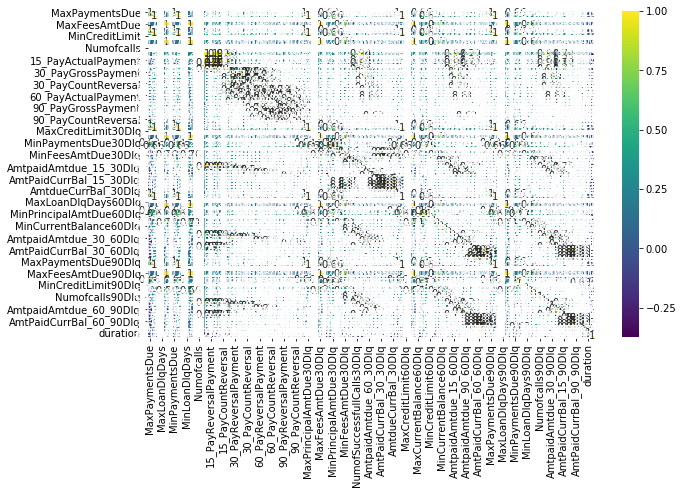

In [20]:
k=109
cols=df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cols, annot=True, cmap='viridis')

In [27]:
X=df1.loc[:, df1.columns!= 'target']
y=df1.loc[:, df1.columns== 'target']

In [28]:
X.shape

(3348, 109)

In [29]:
y.shape

(3348, 1)

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [88]:
model=LogisticRegression(max_iter=3500)
baseline_model=model.fit(X_train, y_train)

C:\Users\VINAY P\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\VINAY P\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [89]:
baseline_model.fit(X_train, y_train)

C:\Users\VINAY P\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\VINAY P\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
np.round(baseline_model.coef_, decimals=2)>0

array([[False, False, False,  True, False, False, False, False, False,
         True, False, False, False, False,  True, False, False,  True,
        False, False, False, False, False,  True, False, False, False,
        False, False,  True, False, False, False, False, False,  True,
        False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False,  True, False, False,  True,
         True,  True, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False,  True,  True,  True, False, False,
        False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False,  True,
         True,  True,  True, False, False, False, False, False, False,
         True]])

In [91]:
y_pred=baseline_model.predict(X_train)
cnf_matrix_train = confusion_matrix(y_train, y_pred)
cnf_matrix_train

array([[  35,  298],
       [  21, 1989]], dtype=int64)

In [92]:
y1_pred=baseline_model.predict(X_test)
cnf_matrix_test = confusion_matrix(y_test, y1_pred)
cnf_matrix_test

array([[  8, 142],
       [ 12, 843]], dtype=int64)

In [93]:
from sklearn import metrics

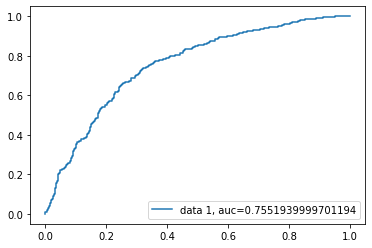

In [94]:
y_pred_proba1= baseline_model.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba1)
auc = metrics.roc_auc_score(y_train, y_pred_proba1)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

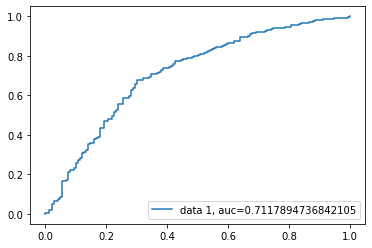

In [95]:
y_pred_proba = baseline_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [96]:
print('accuracy :',accuracy_score(y_train, baseline_model.predict(X_train)))
print('f1_score :',f1_score(y_train, baseline_model.predict(X_train)))

accuracy : 0.863849765258216
f1_score : 0.9257621596462648


In [97]:
print('accuracy :',accuracy_score(y_test, baseline_model.predict(X_test)))
print('f1_score :',f1_score(y_test, baseline_model.predict(X_test)))

accuracy : 0.8467661691542289
f1_score : 0.9163043478260869


# univariate feature selection

In [98]:
select_feature=SelectKBest(chi2, k=5).fit(X_train, y_train)

In [107]:
select_feature_df=pd.DataFrame({"feature":list(x_train.columns),
                               'Scores':select_feature.scores_})
select_feature_df=select_feature_df.sort_values(by='Scores', ascending=False).reset_index()

In [108]:
X_train_chi=select_feature.transform(X_train)
X_test_chi=select_feature.transform(X_test)

In [109]:
X_train.head(2)

,MaxPaymentsDue,MaxPrincipalAmtDue,MaxCreditLimit,MaxLoanDlqDays,MaxFeesAmtDue,MaxCurrentBalance,MinPaymentsDue,MinPrincipalAmtDue,MinCreditLimit,MinLoanDlqDays,MinFeesAmtDue,MinCurrentBalance,Numofcalls,NumofSuccessfullCalls,15_PayGrossPayment,15_PayReversalPayment,15_PayActualPayment,15_PayCountPayment,15_PayCountReversal,15_PayAvgPaid,30_PayGrossPayment,30_PayReversalPayment,30_PayActualPayment,30_PayCountPayment,30_PayCountReversal,30_PayAvgPaid,60_PayGrossPayment,60_PayReversalPayment,60_PayActualPayment,60_PayCountPayment,60_PayCountReversal,60_PayAvgPaid,90_PayGrossPayment,90_PayReversalPayment,90_PayActualPayment,90_PayCountPayment,90_PayCountReversal,90_PayAvgPaid,MaxPaymentsDue30Dlq,MaxPrincipalAmtDue30Dlq,MaxCreditLimit30Dlq,MaxLoanDlqDays30Dlq,MaxFeesAmtDue30Dlq,MaxCurrentBalance30Dlq,MinPaymentsDue30Dlq,MinPrincipalAmtDue30Dlq,MinCreditLimit30Dlq,MinLoanDlqDays30Dlq,MinFeesAmtDue30Dlq,MinCurrentBalance30Dlq,Numofcalls30Dlq,NumofSuccessfullCalls30Dlq,AmtpaidAmtdue_15_30Dlq,AmtpaidAmtdue_30_30Dlq,AmtpaidAmtdue_60_30Dlq,AmtpaidAmtdue_90_30Dlq,AmtPaidCurrBal_15_30Dlq,AmtPaidCurrBal_30_30Dlq,AmtPaidCurrBal_60_30Dlq,AmtPaidCurrBal_90_30Dlq,AmtdueCurrBal_30Dlq,MaxPaymentsDue60Dlq,MaxPrincipalAmtDue60Dlq,MaxCreditLimit60Dlq,MaxLoanDlqDays60Dlq,MaxFeesAmtDue60Dlq,MaxCurrentBalance60Dlq,MinPaymentsDue60Dlq,MinPrincipalAmtDue60Dlq,MinCreditLimit60Dlq,MinLoanDlqDays60Dlq,MinFeesAmtDue60Dlq,MinCurrentBalance60Dlq,Numofcalls60Dlq,NumofSuccessfullCalls60Dlq,AmtpaidAmtdue_15_60Dlq,AmtpaidAmtdue_30_60Dlq,AmtpaidAmtdue_60_60Dlq,AmtpaidAmtdue_90_60Dlq,AmtPaidCurrBal_15_60Dlq,AmtPaidCurrBal_30_60Dlq,AmtPaidCurrBal_60_60Dlq,AmtPaidCurrBal_90_60Dlq,AmtdueCurrBal_60Dlq,MaxPaymentsDue90Dlq,MaxPrincipalAmtDue90Dlq,MaxCreditLimit90Dlq,MaxLoanDlqDays90Dlq,MaxFeesAmtDue90Dlq,MaxCurrentBalance90Dlq,MinPaymentsDue90Dlq,MinPrincipalAmtDue90Dlq,MinCreditLimit90Dlq,MinLoanDlqDays90Dlq,MinFeesAmtDue90Dlq,MinCurrentBalance90Dlq,Numofcalls90Dlq,NumofSuccessfullCalls90Dlq,AmtpaidAmtdue_15_90Dlq,AmtpaidAmtdue_30_90Dlq,AmtpaidAmtdue_60_90Dlq,AmtpaidAmtdue_90_90Dlq,AmtPaidCurrBal_15_90Dlq,AmtPaidCurrBal_30_90Dlq,AmtPaidCurrBal_60_90Dlq,AmtPaidCurrBal_90_90Dlq,AmtdueCurrBal_90Dlq,call_count,duration
2404,366.70,289.31,0.0,1.0,40.74,0.0,366.70,289.31,0.0,1.0,40.74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,655.62,0.0,655.62,1.0,0.0,655.62,655.62,0.0,655.62,1.0,0.0,655.62,855.62,0.0,855.62,2.0,0.0,427.81,366.70,289.31,0.0,1.0,40.74,0.0,1022.32,761.0332,0.0,32.0,40.74,0.0,27.0,3.0,0.0,0.64,0.64,0.84,0.0,0.0,0.0,0.0,0.0,366.70,289.31,0.0,1.0,40.74,0.0,614.88,539.28,0.0,32.0,20.37,9835.03,74.0,3.0,0.0,1.07,1.07,1.39,0.0,0.07,0.07,0.09,0.06,366.70,289.31,0.0,1.0,40.74,0.0,407.44,308.18,0.0,2.0,0.0,9835.03,101.0,3.0,0.0,1.61,1.61,2.1,0.0,0.07,0.07,0.09,0.04,0.0,0.0
668,310.15,128.32,0.0,1.0,0.00,0.0,310.15,128.32,0.0,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,310.15,0.0,310.15,1.0,0.0,310.15,620.15,0.0,620.15,2.0,0.0,310.07,310.15,128.32,0.0,1.0,0.00,0.0,310.15,128.3200,0.0,1.0,0.00,0.0,0.0,0.0,0.0,0.00,1.00,2.00,0.0,0.0,0.0,0.0,0.0,310.15,128.32,0.0,1.0,0.00,0.0,310.15,128.32,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,1.00,2.00,0.0,0.00,0.00,0.00,0.00,310.15,128.32,0.0,1.0,0.00,0.0,310.15,128.32,0.0,1.0,0.0,0.00,0.0,0.0,0.0,0.00,1.00,2.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0


In [123]:
X_train_chi[0:108]

array([[    0.    ,     0.    ,     0.    ,  9835.03  ,  9835.03  ],
       [    0.    ,     0.    ,     0.    ,     0.    ,     0.    ],
       [    0.    ,     0.    ,     0.    ,     0.    ,     0.    ],
       [    0.    ,     0.    ,     0.    ,  6437.78  ,  6437.78  ],
       [    0.    ,     0.    ,     0.    ,     0.    ,     0.    ],
       [  591.89  ,   591.89  ,     0.    , 15188.04  , 15188.04  ],
       [    0.    ,     0.    ,     0.    , 18215.69  , 18215.69  ],
       [  466.    ,   466.    ,     0.    ,     0.    ,     0.    ],
       [  810.6   ,   775.6   ,     0.    ,  7292.39  ,  7292.39  ],
       [    0.    ,     0.    ,     0.    ,     0.    ,     0.    ],
       [    0.    ,     0.    ,     0.    ,     0.    ,  8177.94  ],
       [    0.    ,     0.    ,     0.    ,     0.    ,     0.    ],
       [    0.    ,     0.    ,     0.    ,     0.    ,     0.    ],
       [    0.    ,     0.    ,     0.    , 17666.33  , 17666.33  ],
       [    0.    ,     0.    ,   

In [124]:
lr_model=baseline_model.fit(X_train_chi, y_train)

C:\Users\VINAY P\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [125]:
y_pred=lr_model.predict(X_train_chi)
cnf_matrix_train = confusion_matrix(y_train, y_pred)
cnf_matrix_train

array([[  14,  319],
       [  17, 1993]], dtype=int64)

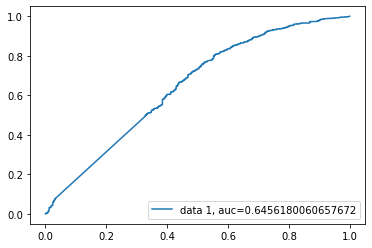

In [126]:
y_pred_proba1= lr_model.predict_proba(X_train_chi)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba1)
auc = metrics.roc_auc_score(y_train, y_pred_proba1)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [127]:
rfe=RFE(estimator=lr_model, step=1)
rfe=rfe.fit(X_train, y_train)

C:\Users\VINAY P\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\VINAY P\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\VINAY P\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the

In [136]:
select_rfe_feature_df=pd.DataFrame({"feature":list(x_train.columns),
                               'Ranking':rfe.ranking_})
select_rfe_feature_df=select_rfe_feature_df.sort_values(by='Ranking').reset_index()

In [137]:
select_rfe_feature_df

,index,feature,Ranking
0,54,AmtpaidAmtdue_60_30Dlq,1
1,75,AmtpaidAmtdue_15_60Dlq,1
2,74,NumofSuccessfullCalls60Dlq,1
3,73,Numofcalls60Dlq,1
4,70,MinLoanDlqDays60Dlq,1
5,64,MaxLoanDlqDays60Dlq,1
6,59,AmtPaidCurrBal_90_30Dlq,1
7,58,AmtPaidCurrBal_60_30Dlq,1
8,76,AmtpaidAmtdue_30_60Dlq,1
9,57,AmtPaidCurrBal_30_30Dlq,1


In [151]:
x_train_rfe=rfe.transform(X_train)
x_test_rfe=rfe.transform(X_test)

In [141]:
x_train_rfe[0:1]

array([[1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.5562e+02, 1.0000e+00, 6.5562e+02, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 8.5562e+02, 2.0000e+00, 0.0000e+00, 2.8931e+02,
        1.0000e+00, 4.0740e+01, 4.0740e+01, 2.7000e+01, 3.0000e+00,
        0.0000e+00, 6.4000e-01, 6.4000e-01, 8.4000e-01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 3.2000e+01, 7.4000e+01,
        3.0000e+00, 0.0000e+00, 1.0700e+00, 1.0700e+00, 1.3900e+00,
        0.0000e+00, 7.0000e-02, 9.0000e-02, 6.0000e-02, 1.0000e+00,
        4.0740e+01, 2.0000e+00, 1.0100e+02, 3.0000e+00, 0.0000e+00,
        1.6100e+00, 1.6100e+00, 2.1000e+00, 0.0000e+00, 7.0000e-02,
        9.0000e-02, 4.0000e-02, 0.0000e+00, 0.0000e+00]])

In [143]:
lr_rfe_model=lr_model.fit(x_train_rfe, y_train)

C:\Users\VINAY P\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\VINAY P\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [144]:
y_pred=lr_rfe_model.predict(x_train_rfe)
cnf_matrix_train = confusion_matrix(y_train, y_pred)
cnf_matrix_train

array([[  72,  261],
       [  50, 1960]], dtype=int64)

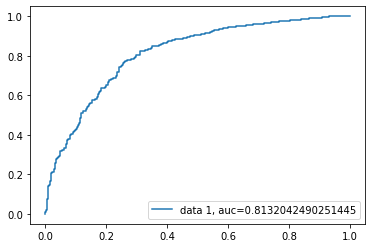

In [147]:
y_pred_proba1= lr_rfe_model.predict_proba(x_train_rfe)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_proba1)
auc = metrics.roc_auc_score(y_train, y_pred_proba1)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [152]:
lr_rfe_model=lr_model.fit(x_test_rfe, y_test)

C:\Users\VINAY P\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\VINAY P\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [154]:
y1_pred=lr_rfe_model.predict(x_test_rfe)
cnf_matrix_train = confusion_matrix(y_test, y1_pred)
cnf_matrix_train

array([[ 32, 118],
       [ 22, 833]], dtype=int64)

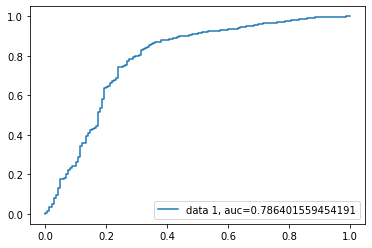

In [156]:
y_pred_proba1= lr_rfe_model.predict_proba(x_test_rfe)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba1)
auc = metrics.roc_auc_score(y_test, y_pred_proba1)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()